In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import docx
from docx.shared import Cm

In [2]:
#docx me permite generar documentos de word, llenar un documento de word
doc=docx.Document() #iniciar el documento
doc.add_heading('Este es un título')
doc.add_paragraph('Este es un parrafo')
doc.save('prueba.docx') #terminar el documento

In [3]:
df=pd.read_csv('empleados.csv')
df['Definitivo']=df['Definitivo'].astype(bool)
df['Fecha Contratacion']=pd.to_datetime(df['Fecha Contratacion'])
df['Genero']=df['Genero'].astype('category')
df['Equipo']=df['Equipo'].astype('category')
df.head(5)

,Nombre,Genero,Fecha Contratacion,Salario,Definitivo,Equipo
0,Douglas,Masculino,1993-08-06,NaN,True,Marketing
1,Thomas,Masculino,1996-03-31,61933.0,True,NaN
2,Maria,Femenino,NaT,130590.0,False,Finanzas
3,Jerry,NaN,2005-03-04,138705.0,True,Finanzas
4,Larry,Masculino,1998-01-24,101004.0,True,TI


In [4]:
%pwd

'C:\\Users\\alda_\\Aldair de Jesus De Leon Hdz\\Codigos'

In [5]:
%config InlineBackend.figure_formats=['svg']

<AxesSubplot:xlabel='Equipo', ylabel='count'>

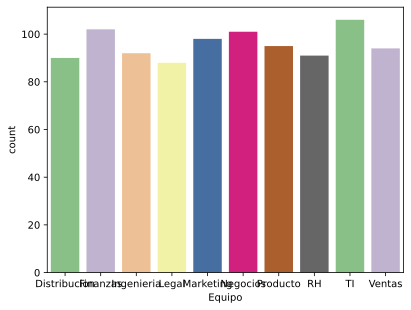

In [6]:
sns.countplot(data=df,x='Equipo',palette=sns.color_palette('Accent')) #modificar colores

In [7]:
def cm2pulg(valor):
    return valor/2.54

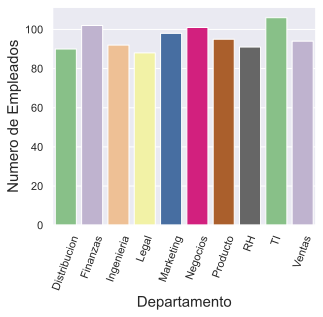

In [8]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(10))})
g=sns.countplot(data=df,x='Equipo',palette=sns.color_palette('Accent'))
g.set_xlabel('Departamento',fontsize=15)
g.set_ylabel('Numero de Empleados',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
plt.savefig('histograma_equipos.jpg',dpi=300,bbox_inches='tight')

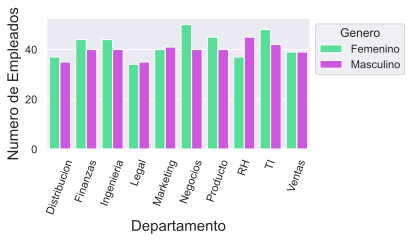

In [9]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(6))})
g=sns.countplot(data=df,x='Equipo',hue='Genero',
                palette=['#42f595','#dd42f5'])
g.set_xlabel('Departamento',fontsize=15)
g.set_ylabel('Numero de Empleados',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
sns.move_legend(g,'upper left',bbox_to_anchor=(1,1))
plt.savefig('histograma_equipos_genero.jpg',dpi=300,bbox_inches='tight')

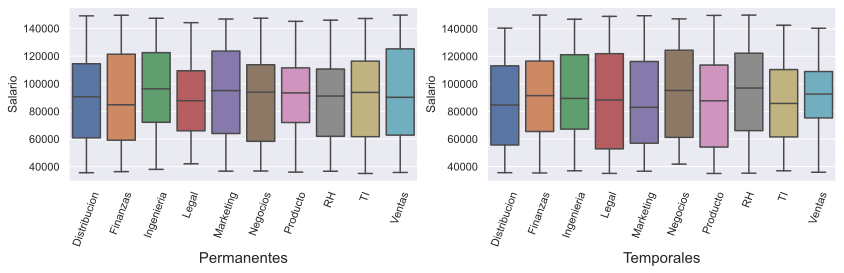

In [10]:
fig,axes=plt.subplots(1,2,figsize=(cm2pulg(35),cm2pulg(8)))

g=sns.boxplot(ax=axes[0],data=df[df['Definitivo']==True],x='Equipo',y='Salario')
g.set_xlabel('Permanentes',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
g=sns.boxplot(ax=axes[1],data=df[df['Definitivo']==False],x='Equipo',y='Salario')
g.set_xlabel('Temporales',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);

plt.savefig('grafica_salarios_contrato.jpg',dpi=300,bbox_inches='tight')

In [11]:
#agregar grafica de salarios por departamento pero mostrando la
#diferencia entre hombres y mujeres

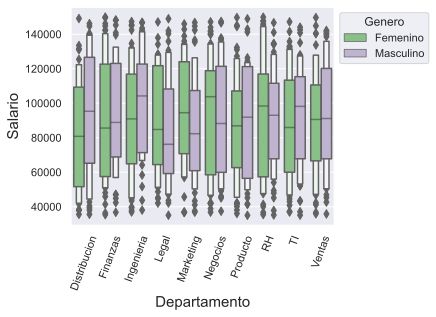

In [12]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(10))})
g=sns.boxenplot(data=df,x='Equipo',y='Salario',hue='Genero',palette=sns.color_palette('Accent'))
g.set_xlabel('Departamento',fontsize=15)
g.set_ylabel('Salario',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
sns.move_legend(g,'upper left',bbox_to_anchor=(1,1))
plt.savefig('boxplot_salarios_genero.jpg',dpi=300,bbox_inches='tight')

In [13]:
equipos=df.groupby('Equipo')

In [14]:
equipos.get_group('Marketing').head()

,Nombre,Genero,Fecha Contratacion,Salario,Definitivo,Equipo
0,Douglas,Masculino,1993-08-06,NaN,True,Marketing
21,Matthew,Masculino,1995-09-05,100612.0,False,Marketing
26,Craig,Masculino,2000-02-27,37598.0,True,Marketing
43,Marilyn,Femenino,1980-12-07,73524.0,True,Marketing
62,NaN,Femenino,2007-06-12,58112.0,True,Marketing


In [15]:
equipos.nth(5)

,Nombre,Genero,Fecha Contratacion,Salario,Definitivo
Equipo,,,,,
Distribucion,NaN,Femenino,2014-08-17,86230.0,True
Finanzas,Alan,NaN,2014-03-03,40341.0,True
Ingenieria,Irene,Femenino,1997-05-07,66851.0,False
Legal,Beverly,Femenino,1998-09-09,121918.0,False
Marketing,Thomas,Masculino,1995-06-04,62096.0,False
Negocios,Clarence,Masculino,1996-03-26,93581.0,True
Producto,Cynthia,Femenino,1988-11-16,145146.0,True
RH,Bonnie,Femenino,1991-07-02,104897.0,True
TI,Terry,Masculino,1981-11-27,124008.0,True


In [16]:
equipos.ngroups

10

In [17]:
equipos.size()

Equipo
Distribucion     90
Finanzas        102
Ingenieria       92
Legal            88
Marketing        98
Negocios        101
Producto         95
RH               91
TI              106
Ventas           94
dtype: int64

In [18]:
equipos.count()

,Nombre,Genero,Fecha Contratacion,Salario,Definitivo
Equipo,,,,,
Distribucion,77,72,90,90,90
Finanzas,97,84,101,102,102
Ingenieria,86,84,92,92,92
Legal,86,69,88,88,88
Marketing,91,81,98,97,98
Negocios,99,90,101,101,101
Producto,92,85,95,95,95
RH,85,82,91,91,91
TI,100,90,106,106,106


In [19]:
equipos['Salario'].describe()

,count,mean,std,min,25%,50%,75%,max
Equipo,,,,,,,,
Distribucion,90.0,88500.466667,33538.473345,35575.0,59848.75,86842.0,114798.75,149105.0
Finanzas,102.0,92219.480392,34475.515066,35381.0,63060.25,88873.5,121189.00,149908.0
Ingenieria,92.0,94269.195652,32349.531179,36946.0,69713.00,95273.0,122170.50,147362.0
Legal,88.0,89303.613636,32755.649720,35061.0,64557.50,87994.5,117102.75,148985.0
Marketing,97.0,90364.742268,34345.530217,36643.0,58755.00,85213.0,118906.00,149456.0
Negocios,101.0,91866.316832,33461.860802,36844.0,59680.00,93997.0,120204.00,147417.0
Producto,95.0,88665.505263,31997.406562,35013.0,60930.50,88657.0,113035.50,149684.0
RH,91.0,90944.527473,33107.945736,35203.0,64439.50,93022.0,113200.00,149903.0
TI,106.0,88224.424528,31272.598888,35095.0,61430.50,90356.0,114286.75,147183.0


In [20]:
equipos['Salario'].aggregate([min,max,sum,'mean'])

,min,max,sum,mean
Equipo,,,,
Distribucion,35575.0,149105.0,7965042.0,88500.466667
Finanzas,35381.0,149908.0,9406387.0,92219.480392
Ingenieria,36946.0,147362.0,8672766.0,94269.195652
Legal,35061.0,148985.0,7858718.0,89303.613636
Marketing,36643.0,149456.0,8765380.0,90364.742268
Negocios,36844.0,147417.0,9278498.0,91866.316832
Producto,35013.0,149684.0,8423223.0,88665.505263
RH,35203.0,149903.0,8275952.0,90944.527473
TI,35095.0,147183.0,9351789.0,88224.424528


In [21]:
equipos['Salario'].agg([min,max,sum,'mean'])

,min,max,sum,mean
Equipo,,,,
Distribucion,35575.0,149105.0,7965042.0,88500.466667
Finanzas,35381.0,149908.0,9406387.0,92219.480392
Ingenieria,36946.0,147362.0,8672766.0,94269.195652
Legal,35061.0,148985.0,7858718.0,89303.613636
Marketing,36643.0,149456.0,8765380.0,90364.742268
Negocios,36844.0,147417.0,9278498.0,91866.316832
Producto,35013.0,149684.0,8423223.0,88665.505263
RH,35203.0,149903.0,8275952.0,90944.527473
TI,35095.0,147183.0,9351789.0,88224.424528


In [22]:
#cuantas personas se an contratado en cada uno de los años de la empresa?

In [23]:
df['Fecha Contratacion'].dt.year

0      1993.0
1      1996.0
2         NaN
3      2005.0
4      1998.0
        ...  
995    2014.0
996    1984.0
997    2013.0
998    2013.0
999    2012.0
Name: Fecha Contratacion, Length: 1000, dtype: float64

In [24]:
años=df.groupby(df['Fecha Contratacion'].dt.year)

In [25]:
años.first()

,Nombre,Genero,Fecha Contratacion,Salario,Definitivo,Equipo
Fecha Contratacion,,,,,,
1980.0,Louise,Femenino,1980-08-12,63241.0,True,RH
1981.0,Diana,Femenino,1981-10-23,132940.0,False,TI
1982.0,Pamela,Femenino,1982-07-01,54585.0,False,Producto
1983.0,Robin,Femenino,1983-06-04,114797.0,True,Ventas
1984.0,Michelle,Femenino,1984-03-30,57325.0,True,RH
1985.0,Harold,Masculino,1985-01-02,77544.0,False,Negocios
1986.0,Shawn,Masculino,1986-12-07,111737.0,False,Producto
1987.0,Dennis,Masculino,1987-04-18,115163.0,False,Legal
1988.0,Cynthia,Femenino,1988-11-16,145146.0,True,Producto


In [26]:
años.size()

Fecha Contratacion
1980.0    30
1981.0    21
1982.0    28
1983.0    22
1984.0    32
1985.0    18
1986.0    28
1987.0    16
1988.0    25
1989.0    20
1990.0    22
1991.0    27
1992.0    28
1993.0    18
1994.0    24
1995.0    44
1996.0    32
1997.0    29
1998.0    19
1999.0    37
2000.0    26
2001.0    25
2002.0    34
2003.0    26
2004.0    31
2005.0    31
2006.0    26
2007.0    33
2008.0    25
2009.0    42
2010.0    28
2011.0    30
2012.0    28
2013.0    29
2014.0    28
2015.0    22
2016.0    15
dtype: int64

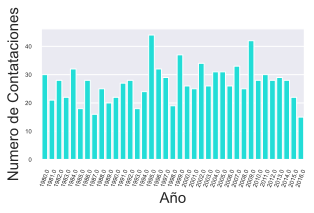

In [27]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(6))})
g=sns.barplot(x=años.size().index,y=años.size().values,palette=['#03fcf4'])
g.set_xlabel('Año',fontsize=15)
g.set_ylabel('Numero de Contataciones',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
g.tick_params(labelsize=6)
plt.savefig('contrataciones_años.jpg',dpi=300,bbox_inches='tight')

In [28]:
años['Salario'].agg(['sum'])['sum'].values

array([2419990., 1908612., 2657774., 1924832., 2757613., 1577714.,
       2129790., 1498701., 2487024., 2095041., 1919289., 2480362.,
       2846854., 1619196., 2053680., 3926904., 3106016., 2612488.,
       1762084., 3307167., 2103191., 2119698., 2833657., 2512297.,
       2519797., 2858479., 2414377., 3137343., 2030731., 4329681.,
       2441356., 2560468., 2481726., 2806807., 2569631., 2177542.,
       1446371.])

In [29]:
años['Salario'].agg('sum').index

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0],
             dtype='float64', name='Fecha Contratacion')

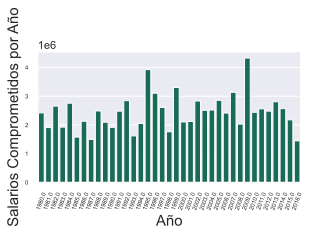

In [30]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(6))})
g=sns.barplot(x=años['Salario'].agg('sum').index,y=años['Salario'].agg(['sum'])['sum'].values,palette=['#0b785e'])
g.set_xlabel('Año',fontsize=15)
g.set_ylabel('Salarios Comprometidos por Año',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
g.tick_params(labelsize=6)
plt.savefig('salarios_comprometidos_años.jpg',dpi=300,bbox_inches='tight')

In [31]:
#Cual es el salario total de la empresa en cada uno de los años?

In [32]:
df_apoyo=años['Salario'].agg(['sum'])

In [33]:
df_apoyo.head()

,sum
Fecha Contratacion,
1980.0,2419990.0
1981.0,1908612.0
1982.0,2657774.0
1983.0,1924832.0
1984.0,2757613.0


In [34]:
df_apoyo['sum'].cumsum().values

array([ 2419990.,  4328602.,  6986376.,  8911208., 11668821., 13246535.,
       15376325., 16875026., 19362050., 21457091., 23376380., 25856742.,
       28703596., 30322792., 32376472., 36303376., 39409392., 42021880.,
       43783964., 47091131., 49194322., 51314020., 54147677., 56659974.,
       59179771., 62038250., 64452627., 67589970., 69620701., 73950382.,
       76391738., 78952206., 81433932., 84240739., 86810370., 88987912.,
       90434283.])

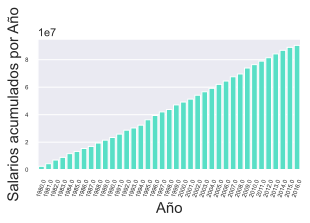

In [35]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(6))})
g=sns.barplot(x=años['Salario'].agg(['sum']).index,y=df_apoyo['sum'].cumsum().values,palette=['#42f5d4'])
g.set_xlabel('Año',fontsize=15)
g.set_ylabel('Salarios acumulados por Año',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
g.tick_params(labelsize=6)
plt.savefig('salarios_acumulados.jpg',dpi=300,bbox_inches='tight')

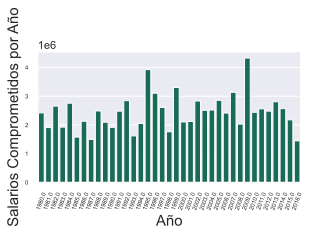

In [36]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(6))})
g=sns.barplot(x=años['Salario'].agg('sum').index,y=años['Salario'].agg(['sum'])['sum'].values,palette=['#0b785e'])
g.set_xlabel('Año',fontsize=15)
g.set_ylabel('Salarios Comprometidos por Año',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
g.tick_params(labelsize=6)
plt.savefig('salarios_comprometidos_años.jpg',dpi=300,bbox_inches='tight')

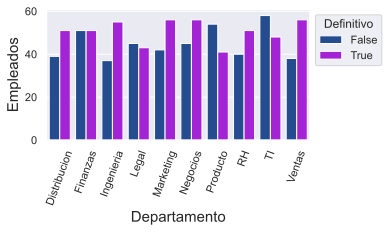

In [37]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(6))})
g=sns.countplot(data=df,x='Equipo',hue='Definitivo',
                palette=['#1248a1','#b007f2'])
g.set_xlabel('Departamento',fontsize=15)
g.set_ylabel('Empleados',fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70);
sns.move_legend(g,'upper left',bbox_to_anchor=(1,1))
plt.savefig('empleados_contratos.jpg',dpi=300,bbox_inches='tight')

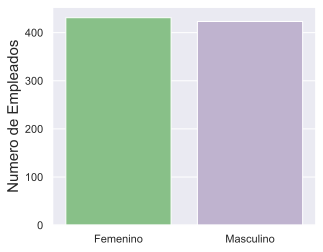

In [38]:
sns.set(rc={'figure.figsize':(cm2pulg(12),cm2pulg(10))})
g=sns.countplot(data=df,x='Genero',palette=sns.color_palette('Accent'))
g.set_xlabel('',fontsize=15)
g.set_ylabel('Numero de Empleados',fontsize=15)
plt.savefig('igualdad_genero.jpg',dpi=300,bbox_inches='tight')

In [40]:
import matplotlib.pyplot as plt

In [39]:
doc=docx.Document()
doc.add_heading('ALDAIR DE JESUS DE LEON HERNANDEZ')

doc.add_heading('REPORTE DE EMPLEADOS')
doc.add_paragraph('A continuación, se mostraran algunas gráficas que ilustren datos estadisticos relacionados a la contratación de personal y oferta salarial, para así evitar disparidad y recompensar correctamente el esfuerzo y habilidad de los trabajadores con el objetivo de aumentar su rendimiento y así generar más dinero para la compañía')
doc.add_paragraph('En esta primera gráfica se muestra la cantidad de empleados por departamento en la empresa.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('histograma_equipos_genero.jpg',width=Cm(12),height=Cm(7))

doc.add_paragraph('A continución, se muestra la cantidad de contrataciones por año en la historia de la compañia, destacando 1995 como el año en que más contrataciones se hicieron.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('contrataciones_años.jpg',width=Cm(12),height=Cm(7))

doc.add_paragraph('También se anexa una gráfica donde se muestra el capital invertido en salarios año por año desde 1980.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('salarios_acumulados.jpg',width=Cm(12),height=Cm(7))

doc.add_paragraph('En la siguiente, analizamos el número de empleados temporales y permanentes con los que contamos en cada departamento.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('empleados_contratos.jpg',width=Cm(12),height=Cm(7))

doc.add_paragraph('Definitivamente hay una diferencia entre el salario que ganan los temporales y quienes ya tienen un contrato permanente, esta gráfica nos permite observar esa diferencia en cada departamento.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('grafica_salarios_contrato.jpg',width=Cm(15),height=Cm(6))

doc.add_paragraph('Comprometidos con un espacio laboral donde radica la igualdad de género, demostramos mantner un equilibrio sin favoritismo en nuestra selección de personal.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('igualdad_genero.jpg',width=Cm(12),height=Cm(7))

doc.add_paragraph('Ilustrando lo anterior, esta gráfica representa nuestro compromiso en recompensar la habilidad de nuestros empleados sin que influya ningún otro parámetro distintivo.')
doc.add_paragraph()

p=doc.add_paragraph()
r=p.add_run()
r.add_picture('boxplot_salarios_genero.jpg',width=Cm(12),height=Cm(10))

doc.save('actividad_reporte.docx')